In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.html.widgets import *
from ipywidgets import jslink
from IPython.display import display
from skimage.color import rgb2gray
from skimage import img_as_ubyte

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def imshow(*imgs, **kw):
    nimg = len(imgs)
    if kw.get('col') is None:
        col = nimg ** .5
        col = int(col + 1 if col % 1 else col)
    else:
        col = kw.pop('col')
    row = nimg / col
    row = row + 1 if (col * row) - nimg else row
    if row == col == 1:
        plts = [plt.subplots(row,col,figsize=kw.pop('figsize',(10,10)))[1]]
    else:
        plts = plt.subplots(row,col,figsize=kw.pop('figsize',(10,10)))[1].ravel()
    for img, ax in zip(imgs, plts):
        if len(img)==2:
            name, img = img
            ax.imshow(img,**kw)
            ax.set_title(name)
        else:
            ax.imshow(img,**kw)
    plt.show()

In [3]:
def func(sample_freq, order):
    x, y = np.mgrid[-1:1:sample_freq*1j, -1:1:sample_freq*1j]
    z = 1 * np.exp(-2*(x**order+y**order))
    imshow(z,cmap=None,figsize=(5,5))
    
interactive(func,sample_freq=(1, 120, 1), order=(2, 20, 2))

In [4]:
img = plt.imread(r'/home/dondana/vishnu/workspace_py/dataBase/training/lena.jpg')
def func(down_sample):
    imshow(('Original',img), 
           ('Spatial Quantized',img[::down_sample,::down_sample]))
interactive(func,down_sample=(1, 50, 1))

In [5]:
# img1 = plt.imread(r'/home/dondana/vishnu/workspace_py/dataBase/training/sampling.jpg')
# img1 = img_as_ubyte(rgb2gray(img1))

img1 = cv2.imread(r'/home/dondana/vishnu/workspace_py/dataBase/training/sampling.jpg',0)

def quantize_img(quantize_level):
    img2 = img1.copy()
    step = np.linspace(0, 256, quantize_level + 1).astype('u2')
    
    nstep = step[1:]
    for ps, ns in zip(step, nstep):
        img2[(ps <= img1) & (img1 <= ns)] = ps
    img2 = img2.astype('u1')
    imshow(('Original', img1),
           ('Amplitude Quantized', img2), cmap='gray')
    print step
    
interactive(quantize_img,quantize_level=(2, 255, 1))

In [6]:

# img1 = plt.imread(r'/home/dondana/vishnu/workspace_py/dataBase/training/gumby.bmp')
# img1 = img_as_ubyte(rgb2gray(img1))
img1 = cv2.imread(r'/home/dondana/vishnu/workspace_py/dataBase/training/gumby.bmp',0)

def edge_detection(scale):
    img2 = img1.copy()
    img3 = img1.copy()
    img4 = np.zeros_like(img1).copy()

    img2[:-scale] = img1[scale:]
    img2 = img1 - img2
    img3[scale:] = img1[:-scale]
    img3 = img1 - img3
    img4[img2 == 255] = 255
    img4[img3 == 255] = 255
    imshow(('Input Image',img1), 
           ('Slide Left Top', img2),
           ('Slide Right Bottom', img3),
           ('Output Image', img4),
           cmap='binary')
interactive(edge_detection,scale=(1, 25, 1))

In [7]:
def corr2(a, k):
    a = a.astype('i8')
    k = k.astype('i8')
    out = np.zeros_like(a)
    rows, cols = a.shape
    krows, kcols = k.shape
    print rows, cols, krows, kcols
    # find center position of kernel (half of kernel size)
    kxcenter = kcols / 2
    kycenter = krows / 2
    for row in range(rows):
        for col in range(cols):
            for krow in range(krows):
                flip_row = krows - 1 - krow
                for kcol in range(kcols):
                    flip_col = kcols - 1 - kcol
                    irow = row + (krow - kycenter)
                    icol = col + (kcol - kxcenter)
                    if 0 <= irow < rows and 0 <= icol < cols:
                        out[row][col] += a[irow][icol] * k[flip_row][flip_col]
    return out

def corr1():
    # The convolution operation is applicable for linear time invariant (LTI) systems only
    x = img1.astype('u8') #np.array([-1,-1,-1,1,1,1])
    y = img2.astype('u8') #np.array([1,1,1,1,1,1])
    sxx = x*x.T - x.sum()*x.sum()/x.size
    syy = y*y.T - y.sum()*y.sum()/y.size
    sxy = x*y.T - x.sum()*y.sum()/x.size
    rho = sxy / (sxx*syy)**.5
    print sxx
    print syy
    print sxy
    print rho

In [8]:
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])
edge = x[:-1] - x[1:]
edge[edge <= 0] = 0  # quantization
edge[edge > 0] = 1  # quantization
print edge
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])
edge = x[1:] - x[:-1]
edge[edge <= 0] = 0 # quantization
edge[edge > 0] = 1 # quantization
print edge

[0 0 0 1 0 0 0]
[0 0 0 0 0 0 0]


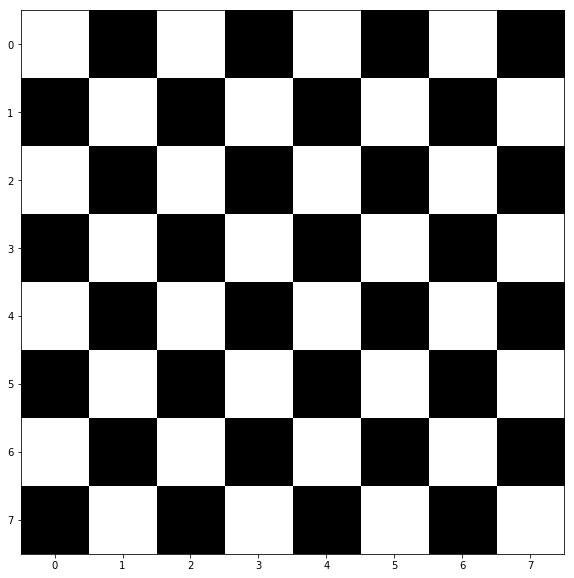

In [9]:
pix = 1
min,max = 0,255
chess_board = np.ones([8, 8, pix, pix], 'i8')*min
mark = np.ones([pix, pix], 'i8') * max
chess_board[::2,::2] = mark
chess_board[1::2,1::2] = mark
chess_board = np.hstack(np.hstack(chess_board))
imshow(chess_board, cmap='gray')

In [18]:
img = cv2.imread(r'/home/dondana/vishnu/workspace_py/dataBase/training/lena.jpg',0)

def fft(img, inverse=False):
    if not inverse:
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        return fshift
    else:
        f_ishift = np.fft.ifftshift(img)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        return img_back


def hpf(scale):
    fft_img = fft(img)
    magnitude_spectrum = 20 * np.log(np.abs(fft_img))
    hpf_fft_img = fft_img.copy()
    rows, cols = img.shape
    crow, ccol = rows / 2, cols / 2
    hpf_fft_img[crow - scale:crow + scale, ccol - scale:ccol + scale] = 0
    hpf_magnitude_spectrum = 20 * np.log(np.abs(hpf_fft_img))
    hpf_img = fft(hpf_fft_img, inverse=True)

    imshow(
            ('Input Image',img),
            ('Magnitude Spectrum',magnitude_spectrum),
            ('HPF Magnitude Spectrum',hpf_magnitude_spectrum),
            ('Image after HPF',hpf_img), cmap='gray',figsize=(3,3)
    )
    imshow(('Image after HPF',hpf_img), cmap='jet',figsize=(3,3))
interactive(hpf,scale=(1, 25, 1))